# 這裡可做為測試使用，請隨意修改

In [1]:
from functions.Particles import Particles
import scipy.constants as const

In [2]:
N=10
x=Particles(N)
print(x.pos)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [3]:
air_mass=const.physical_constants['alpha particle mass'][0]*7
print(air_mass)

4.65126013499e-26


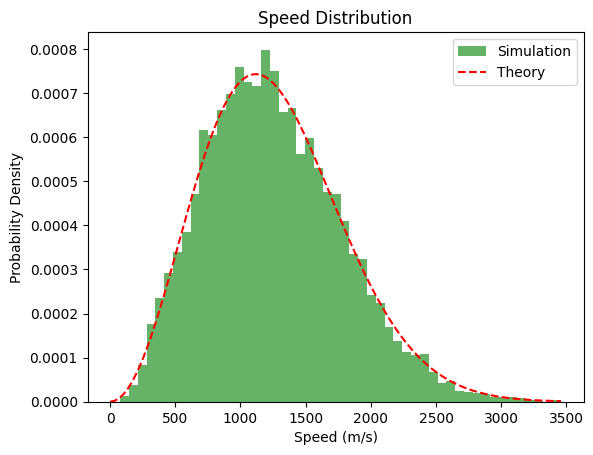

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import gc

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = np.zeros((N, 2))
    vel = maxwell.rvs(scale=np.sqrt(k*temperature / mass), size=(N))
    theta = np.random.uniform(0, 2*np.pi, N) #random angle
    speeds[:,0] = vel[:]*np.cos(theta)
    speeds[:,1] = vel[:]*np.sin(theta)
    return speeds
gc.collect()
# 參數設定
k=const.Boltzmann
N_particles = 10000 # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
#speeds_magnitude=np.sqrt(initial_velocities_2d[:,0]**2+initial_velocities_2d[:,1]**2)
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g', density=True, label='Simulation')

# 計算理論上的波茲曼速度分布
speeds_range = np.linspace(0, np.max(speeds_magnitude), 100)
theory_distribution = maxwell.pdf(speeds_range, scale=np.sqrt(k*temperature / mass))
plt.plot(speeds_range, theory_distribution, 'r--', label='Theory')

plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


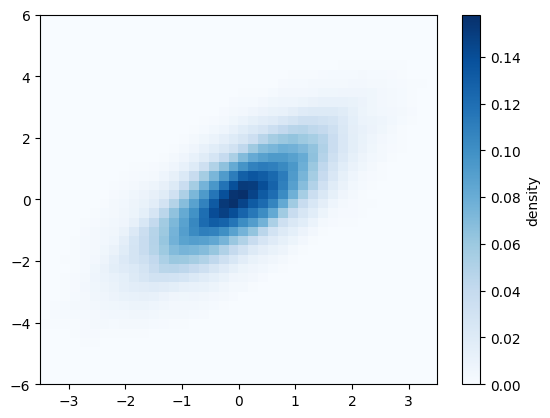

In [5]:
from scipy.stats import gaussian_kde
import numpy as np
# 产生和处理数据，初始化KDE
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的网格中计算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 将图表绘制成一张图像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

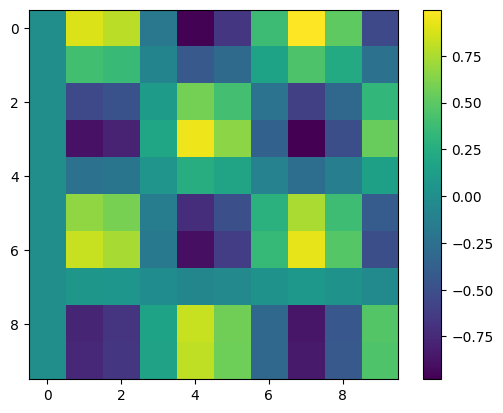

In [6]:
x = np.linspace(0, 10, 10)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

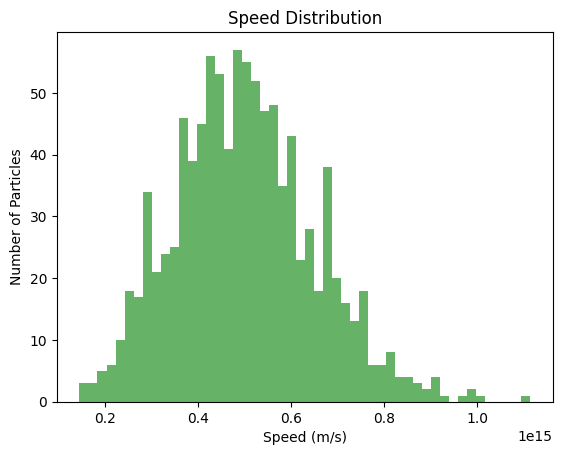

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = maxwell.rvs(scale=np.sqrt(temperature / mass), size=(N, 2))
    return speeds

# 參數設定
N_particles = 1000  # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g')
plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Number of Particles')
plt.show()


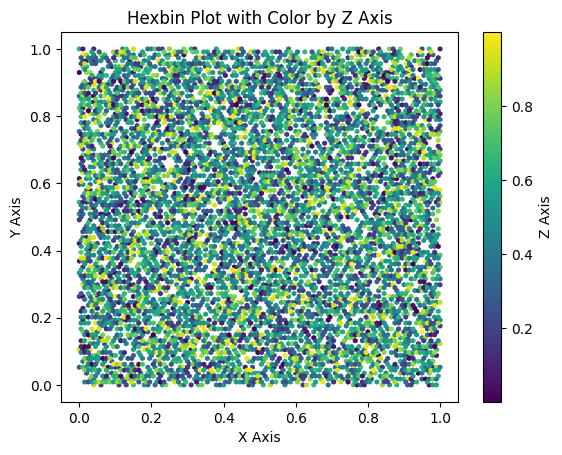

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据作为示例
data = np.random.rand(10000, 3)  # 100个数据点，每个数据点有3个维度的值

# 分别取出 x, y, z 值
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# 绘制 hexbin 图
plt.hexbin(x, y, C=z, gridsize=100, cmap='viridis')  # gridsize 控制网格的大小，cmap 指定色图
plt.colorbar(label='Z Axis')  # 添加颜色条
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Hexbin Plot with Color by Z Axis')
plt.show()

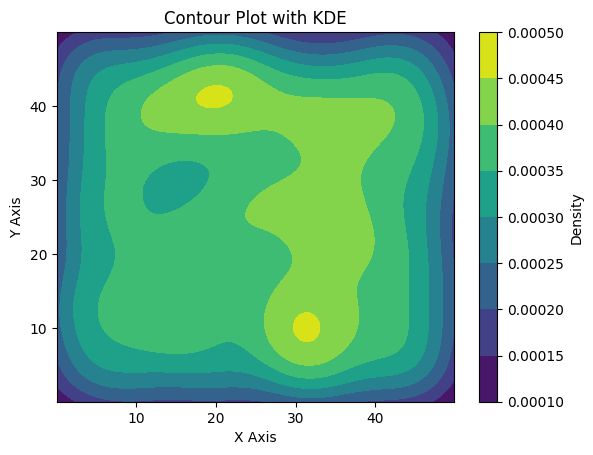

In [20]:
import numpy as np

from functions.Particles import Particles
from functions.DataProcesser import DataProcesser
from functions.Environment import Environment
from functions.Simulators import Simulators


particles_number=1000
particles=Particles(particles_number)
particles.set_particles()
# 生成随机数据作为示例
data = np.random.rand(100, 3)  # 100个数据点，每个数据点有3个维度的值

# 分别取出 x, y, z 值
z=np.linalg.norm(particles.vel, axis=1)**2*particles.mass/(3*const.Boltzmann)
x = particles.pos[:, 0]
y = particles.pos[:, 1]

# 计算 KDE
kde = gaussian_kde([x, y])

# 生成网格点
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z_grid = kde(np.vstack([x_grid.ravel(), y_grid.ravel()]))

# 绘制等高线图
plt.contourf(x_grid, y_grid, z_grid.reshape(x_grid.shape), cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Contour Plot with KDE')
plt.show()

In [51]:
import numba as nb
@nb.jit(parallel=True)
def determine_z_value(xbins,ybins,x,y,z_values):
    # Calculate bin centers
    xcenters = (xbins[:-1] + xbins[1:]) / 2
    ycenters = (ybins[:-1] + ybins[1:]) / 2
    # Initialize an array to store the mean values
    mean_values = np.zeros((len(xcenters), len(ycenters)))

    for i in range(len(xcenters)):
        for j in range(len(ycenters)):
            x_in_bin = (x >= xbins[i]) & (x < xbins[i+1])
            y_in_bin = (y >= ybins[j]) & (y < ybins[j+1])
            points_in_bin = x_in_bin & y_in_bin
            if np.sum(points_in_bin) > 0:
                mean_values[i, j] = np.mean(z_values[points_in_bin])
    return mean_values

In [52]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined 'particles' and 'const' somewhere in your code
particles_number=100000
particles=Particles(particles_number)
particles.set_particles(pos_type='uniform',vel_type='Boltzmann',room_size=[0,50,0,50],T=300,particle_type='air')
# Extract x, y positions from particles
x = particles.pos[:, 0]
y = particles.pos[:, 1]

# Assuming you have a third dimension 'z_values'
z_values = np.linalg.norm(particles.vel, axis=1)**2*particles.mass/(3*const.Boltzmann)

# Define resolution and room size
resolution = 1000  # Example resolution
xmin, xmax, ymin, ymax = particles.room_size

# Calculate bin edges
xbins = np.linspace(xmin, xmax, resolution)
ybins = np.linspace(ymin, ymax, resolution)



# Loop through each bin and calculate the mean value of z_values within that bin
mean_values=determine_z_value(xbins,ybins,x,y,z_values)

tt=np.mean(z_values)
print('T=',tt)
# Plot the 2D histogram with mean values
plt.imshow(mean_values.T, extent=(xmin, xmax, ymin, ymax), cmap='turbo', origin='lower')
plt.colorbar(label='Mean Z Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('2D Histogram with Mean Z Values')
plt.show()
